In [4]:
from config import *
from data import MarketData
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from estimator import *
from backtest import Backtest
from portfolio import *
from MC import monte_carlo_annualized_volatility
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage

## Simulate return data, do a rolling window backtest on different porfolio optimizers, calculate relevant metrics for portfolio performance(annualized return, sharpe, annualized volatility, max drawdown)

                     annualized_ret  annualized_volatility    sharpe  \
index                                                                  
(sample, minVar)           0.131892               0.407100  0.323980   
(sample, hrp)              0.102370               0.355585  0.287893   
(shrinkage, minVar)        0.107715               0.335742  0.320827   
(shrinkage, hrp)           0.103476               0.366709  0.282174   
(equal, ew)                0.135179               0.543120  0.248894   

                     max_drawdown  
index                              
(sample, minVar)        -0.620161  
(sample, hrp)           -0.593490  
(shrinkage, minVar)     -0.559276  
(shrinkage, hrp)        -0.608343  
(equal, ew)             -0.797066  


<Axes: title={'center': 'Portfolio Return Curves'}, xlabel='Date', ylabel='Net Asset Value'>

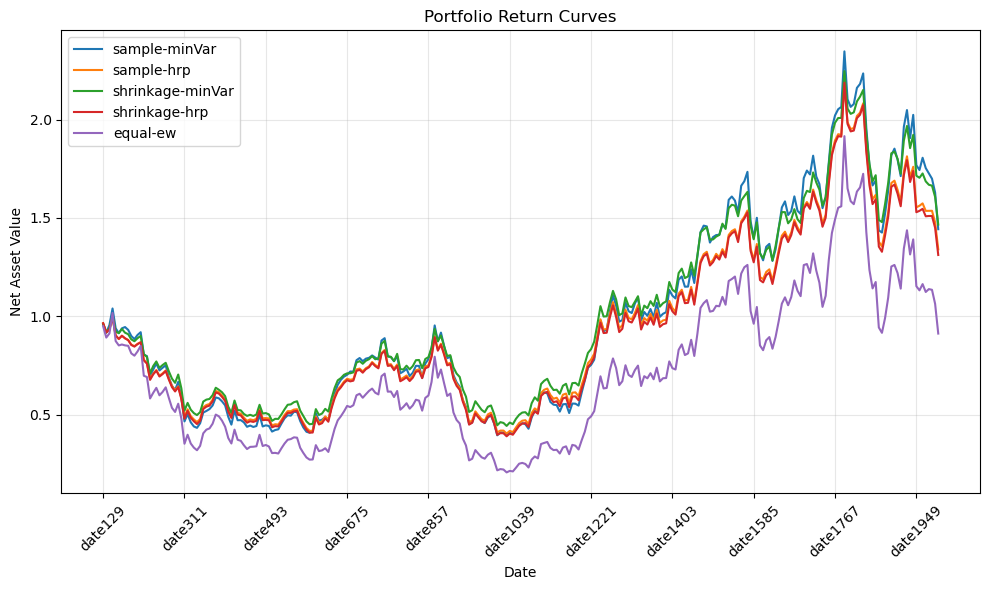

In [5]:
dataConfigSimulation1 = DataConfig(
    use_simulated = True,
    n_assets = 150,              
    n_periods = 2000,
    sim_seed =15,            
    n_clusters = 5,
    within_corr = 0.6,
    between_corr = 0.2,
    sim_vol_low = 0.02,
    sim_vol_high = 0.1,
    annualized_ret_avg_low = 0.02,
    annualized_ret_avg_high = 0.15
)
dataSimulation1 = MarketData(dataConfigSimulation1)
covMatTrue = dataSimulation1.Sigma_true
prices1 = dataSimulation1.get_prices()
rets1 = dataSimulation1.get_returns()

Backtestor1 = Backtest(BacktestConfig(
        rebalance_freq = 7,
        lookBackWindow = 128
    ))
Backtestor1.calculateReturns(rets1.T)
backtestResult = Backtestor1.calculateEvalMetrics()
print(backtestResult)
Backtestor1.plotReturnCurves()

## Monte Carlo simulation:
 1. Visualizes the risk(measured by annualized volatility) of different optimizers, can see that Hrp with linear shrinkage method tends to perform better as n_assets is of similar size of lookBackWindow(This is because in this case sample covariance produces very ill conditioned matrices)

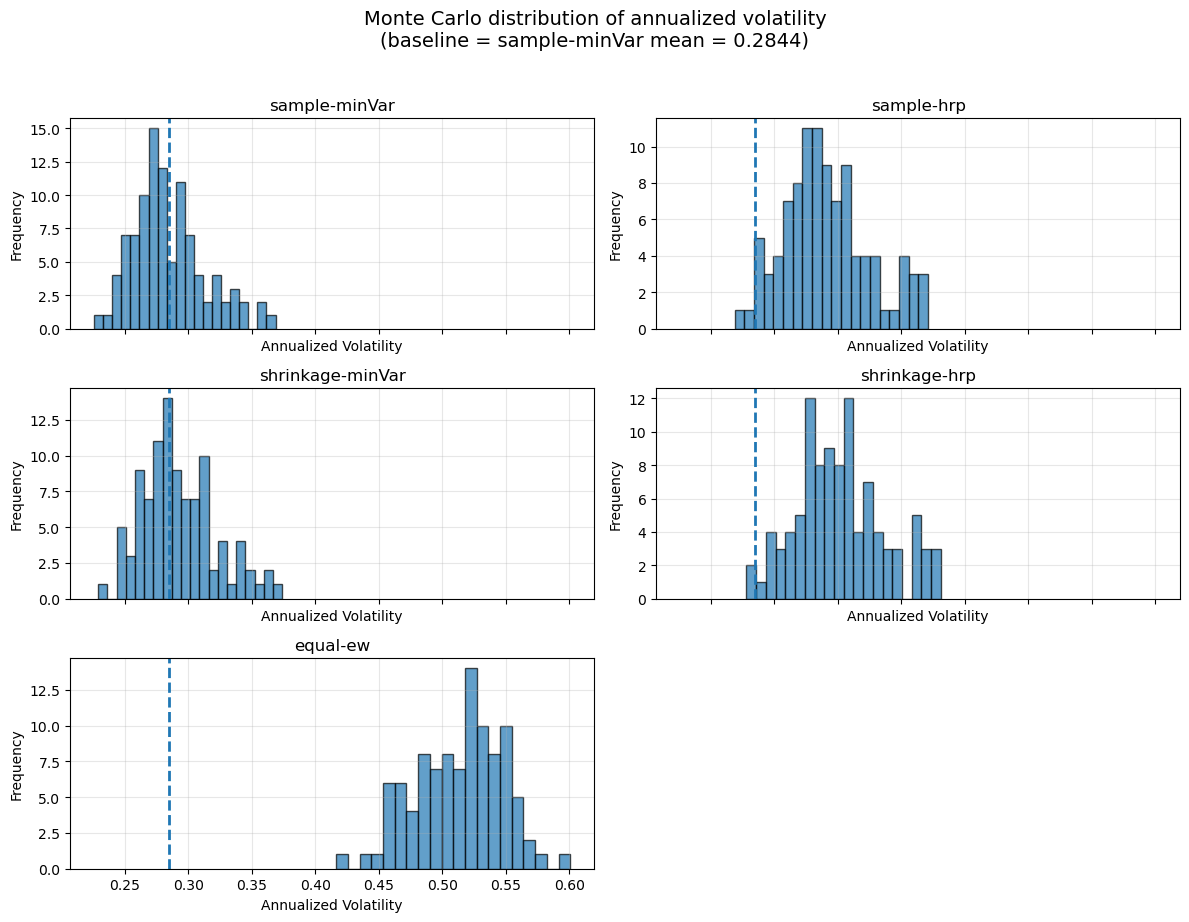

(defaultdict(list,
             {('sample',
               'minVar'): array([0.29253655, 0.27733387, 0.30414583, 0.26242871, 0.27382047,
                     0.29049584, 0.25496183, 0.24879624, 0.28915438, 0.25840505,
                     0.27208886, 0.25478309, 0.3350504 , 0.27439382, 0.30265114,
                     0.27264324, 0.3080788 , 0.27855768, 0.36857206, 0.2712214 ,
                     0.30288047, 0.27045705, 0.28827857, 0.31462645, 0.26672225,
                     0.35782632, 0.26155309, 0.27052113, 0.33563408, 0.33052174,
                     0.27569033, 0.28064074, 0.24149109, 0.34507923, 0.29311033,
                     0.28355599, 0.30012383, 0.27901278, 0.27236235, 0.35771573,
                     0.25221966, 0.27070943, 0.27364234, 0.31563145, 0.32260319,
                     0.29205081, 0.25392028, 0.31027937, 0.22565356, 0.25690545,
                     0.27422447, 0.262555  , 0.29303246, 0.27704527, 0.28277376,
                     0.26061642, 0.27454743, 0.293874

In [3]:
monte_carlo_annualized_volatility(n_assets=50, lookBackWindow=128, trials=100, savefig=False)
monte_carlo_annualized_volatility(n_assets=100, lookBackWindow=128, trials=500, savefig=False)
monte_carlo_annualized_volatility(n_assets=150, lookBackWindow=128, trials=500, savefig=False)

## Test functions for SingleLinkage Algorithm(compared to standard scipy version)

In [8]:
def _generate_random_dist_matrix(N: int, seed: int) -> np.ndarray:
    """
    Generated by chatgpt
    """
    rng = np.random.default_rng(seed)
    m = N * (N - 1) // 2       
    upper = rng.uniform(0.1, 2.0, size=m)

    upper_sorted = np.sort(upper) + np.linspace(0, 1e-6, m)

    dist_condensed = upper_sorted
    distMatrix = squareform(dist_condensed)
    return distMatrix


In [9]:
constructor = portfolioConstructor()
for n in range(2,10):
    matrix = _generate_random_dist_matrix(n, seed=6)
    link_custom = constructor.singleLinkage(matrix)
    dist_condensed = squareform(matrix, checks=False)
    link_scipy = linkage(dist_condensed, method="single")
    print((link_custom == link_scipy).all())

True
True
True
True
True
True
True
True
